In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Creating a DataFrame from the given data
data = pd.DataFrame({
    'Age': [40, 55, 48, 60, 35, 50, 45, 58, 42],
    'Smoking': [0, 1, 1, 0, 0, 1, 0, 1, 0],
    'HeartAttack': [0, 1, 0, 1, 0, 1, 0, 1, 0]
})

# Extracting features (X) and target variable (y)
X = data[['Age', 'Smoking']]
y = data['HeartAttack']

# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Intercept and coefficients
intercept = model.intercept_[0]
coeff_age = model.coef_[0][0]
coeff_smoking = model.coef_[0][1]

print(f'Intercept (beta0): {intercept}')
print(f'Coefficient for Age (beta1): {coeff_age}')
print(f'Coefficient for Smoking (beta2): {coeff_smoking}')

# Predict probability of heart attack for a 45-year-old non-smoker
new_data = pd.DataFrame({'Age': [70], 'Smoking': [1]})
probability = model.predict_proba(new_data)[:, 1][0]  # Probability of heart attack

print(f'Probability of Heart Attack for a 45-year-old non-smoker: {probability:.4f}')


Intercept (beta0): -40.33594336090954
Coefficient for Age (beta1): 0.821113953922151
Coefficient for Smoking (beta2): 0.03604794859019288
Probability of Heart Attack for a 45-year-old non-smoker: 1.0000


In [1]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
# Step 1: Data Preparation
data = pd.DataFrame({
'Age': [40, 55, 48, 60, 35, 50, 45, 58, 42],
'Smoking': [0, 1, 1, 0, 0, 1, 0, 1, 0],
'HeartAttack': [0, 1, 0, 1, 0, 1, 0, 1, 0]
})
# Step 2: Model Training
X = sm.add_constant(data[['Age', 'Smoking']]) # add a constant
#term for the intercept
y = data['HeartAttack']
model = sm.Logit(y, X)
result = model.fit()

# Step 3: Model Summary
print(result.summary())

         Current function value: 0.000003
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            HeartAttack   No. Observations:                    9
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Jun 2025   Pseudo R-squ.:                   1.000
Time:                        22:37:58   Log-Likelihood:            -2.6995e-05
converged:                      False   LL-Null:                       -6.1827
Covariance Type:            nonrobust   LLR p-value:                  0.002065
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -599.0874   4.87e+04     -0.012      0.990    -9.6e+04    9.48e+04
Age           12.8833   1022.665      0.013      0.990   -1991.50

In [10]:
# data load
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()

# Convert data set to pandas data frame
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

# See the categories of target variable
iris.target_names

# take a general notation
X = iris.data[:, :4] # we only take the first four features.
Y = iris.target

# Split dataset into training and test dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4 ,random_state=1234)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5) #C=0.1,0.01
logreg.fit(X, Y)

# See the accuracy rate
logreg.score(X_test,Y_test)

# Make predictions on the test dataset
predictionsModel = logreg.predict(X_test)

# Generate evaluation metrics
print('Classification Report:\n', classification_report(Y_test, predictionsModel))
print('Confusion Matrix:\n', confusion_matrix(Y_test, predictionsModel))
print('Accuracy Score:', accuracy_score(Y_test, predictionsModel))  # Fixed typo here

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.96      1.00      0.98        23
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[19  0  0]
 [ 0 23  0]
 [ 0  1 17]]
Accuracy Score: 0.9833333333333333


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# Define all possible solvers and multi_class options (excluding deprecated usage)
solvers = ["lbfgs", "newton-cg", "saga", "sag", "liblinear"]

# Store results
results = []

for solver in solvers:
    try:
        if solver == "liblinear":
            # liblinear doesn't support multinomial, so no multi_class param needed
            model = LogisticRegression(solver=solver, max_iter=1000)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results.append({"Solver": solver, "Multi-Class": "default", "Accuracy": accuracy})
            print(f"Solver: {solver}, Multi-Class: default, Accuracy: {accuracy:.4f}")
        else:
            # For other solvers, just use default multi_class='auto' to avoid warnings
            model = LogisticRegression(solver=solver, max_iter=100)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results.append({"Solver": solver, "Multi-Class": "auto", "Accuracy": accuracy})
            print(f"Solver: {solver}, Multi-Class: auto, Accuracy: {accuracy:.4f}")

    except Exception as e:
        print(f"Solver: {solver} → Failed with Error: {e}")

# Convert results to DataFrame
df_results = pd.DataFrame(results)
print("\nFinal Results:")
print(df_results)


Solver: lbfgs, Multi-Class: auto, Accuracy: 1.0000
Solver: newton-cg, Multi-Class: auto, Accuracy: 1.0000
Solver: saga, Multi-Class: auto, Accuracy: 1.0000
Solver: sag, Multi-Class: auto, Accuracy: 1.0000
Solver: liblinear, Multi-Class: default, Accuracy: 0.9778

Final Results:
      Solver Multi-Class  Accuracy
0      lbfgs        auto  1.000000
1  newton-cg        auto  1.000000
2       saga        auto  1.000000
3        sag        auto  1.000000
4  liblinear     default  0.977778



Solver: lbfgs, Multi-Class: ovr, Accuracy: 0.9667
Confusion Matrix:
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



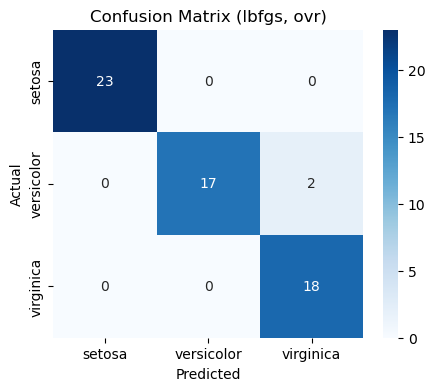


Solver: lbfgs, Multi-Class: multinomial, Accuracy: 0.9667
Confusion Matrix:
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



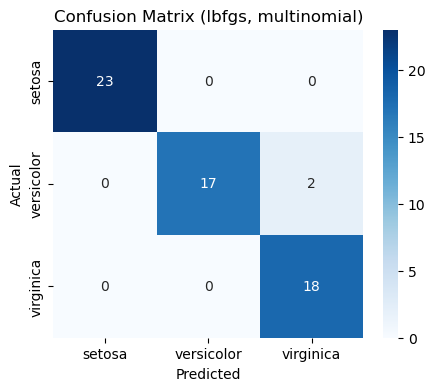


Solver: newton-cg, Multi-Class: ovr, Accuracy: 0.9667
Confusion Matrix:
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



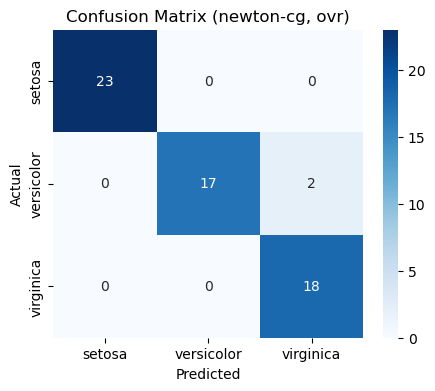


Solver: newton-cg, Multi-Class: multinomial, Accuracy: 0.9667
Confusion Matrix:
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



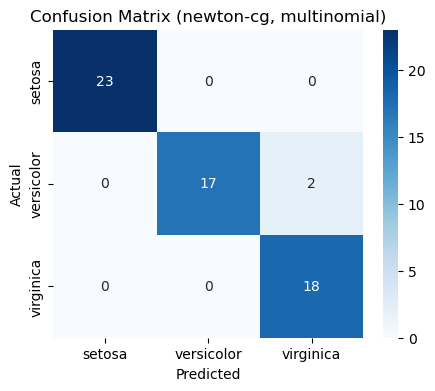


Solver: saga, Multi-Class: ovr, Accuracy: 0.9667
Confusion Matrix:
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



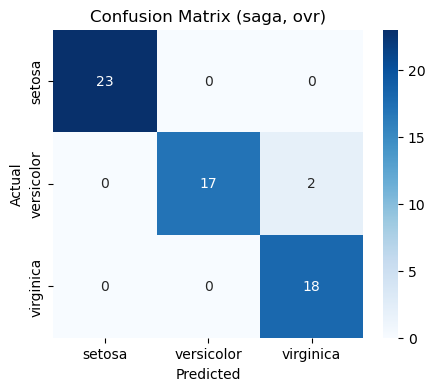


Solver: saga, Multi-Class: multinomial, Accuracy: 0.9667
Confusion Matrix:
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



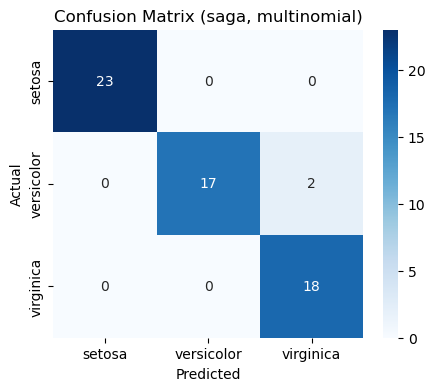


Solver: sag, Multi-Class: ovr, Accuracy: 0.9667
Confusion Matrix:
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



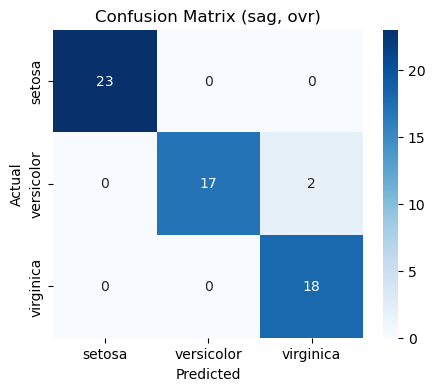


Solver: sag, Multi-Class: multinomial, Accuracy: 0.9667
Confusion Matrix:
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



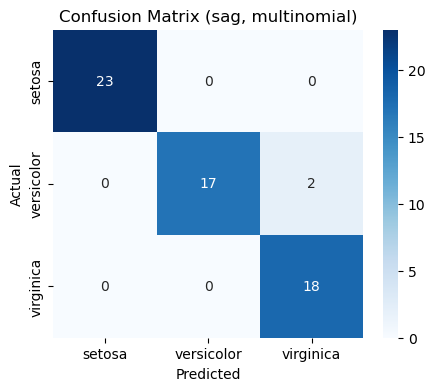


Solver: liblinear, Multi-Class: ovr, Accuracy: 0.9667
Confusion Matrix:
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.89      0.94        19
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



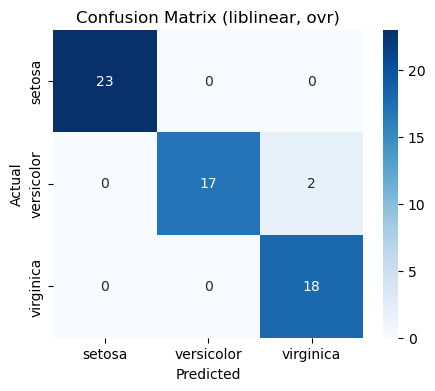


Final Results:
      Solver  Multi-Class  Accuracy
0      lbfgs          ovr  0.966667
1      lbfgs  multinomial  0.966667
2  newton-cg          ovr  0.966667
3  newton-cg  multinomial  0.966667
4       saga          ovr  0.966667
5       saga  multinomial  0.966667
6        sag          ovr  0.966667
7        sag  multinomial  0.966667
8  liblinear          ovr  0.966667


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=42
)

solvers = ["lbfgs", "newton-cg", "saga", "sag", "liblinear"]
multi_class_options = ["ovr", "multinomial"]

results = []

for solver in solvers:
    for mc in multi_class_options:
        if solver == "liblinear" and mc == "multinomial":
            continue  # skip invalid combo

        try:
            if solver == "liblinear":
                # liblinear does not accept multi_class param
                model = LogisticRegression(solver=solver, max_iter=500, random_state=42)
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)

            results.append({"Solver": solver, "Multi-Class": mc, "Accuracy": accuracy})

            print(f"\nSolver: {solver}, Multi-Class: {mc}, Accuracy: {accuracy:.4f}")
            print("Confusion Matrix:")
            print(cm)
            print("Classification Report:")
            print(classification_report(y_test, y_pred))

            plt.figure(figsize=(5, 4))
            sns.heatmap(
                cm,
                annot=True,
                cmap="Blues",
                fmt="d",
                xticklabels=iris.target_names,
                yticklabels=iris.target_names,
            )
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.title(f"Confusion Matrix ({solver}, {mc})")
            plt.show()
            plt.close()  # Close figure after showing to free memory

        except Exception as e:
            print(f"Solver: {solver}, Multi-Class: {mc} → Failed with Error: {e}")

df_results = pd.DataFrame(results)
print("\nFinal Results:")
print(df_results)